# BA780: Introduction to Data Analytics
# Team Project
**Team 8:**
* Jacinto Lemarroy
* Yongxian (Caroline) Lun
* Yipeng (Caroline) Guo
* Chris Chang
* Aash Gohil

***

**Dataset:** 
    HR Analytics: Who Will Change To A New Job
    
 (*Data source from Analytics Vidhya: https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/True/#DiscussTab*)

  The dataset is from JanataHack (Machine Learning Hackathon), a knowledge competition on Machine Learning & Data Science. It's powered by Analytics Vidhya Community, a data science community. 


**Background:**
    A company which is active in Big Data and Data Science wants to hire data scientists among people who received trainning. "Company" wants to analyze the factors affecting candiates' decision on staying or looking for a new job after training. 

**Objective:**
    The project goal is to predict whether a data scientist candidate will look for a new employment or wants to work for the company after training, which helps optimize HR costs and increase efficiencies. By using both descriptive and predictive analysis on a company’s HR dataset, we seek to interpret affected factors on employee decisions. 

# Summary of the Dataset

To explore the factors that influence the employee decision, we chose to narrow the features of our dataset to the following 13 variables:

No.12,477 of rows and 13 features

* enrollee_id : Unique ID for candidate 
-city_ development _index : Developement index of the city (scaled)
-gender: Gender of candidate
-relevent_experience: Relevant experience of candidate
-enrolled_university: Type of University course enrolled if any
-education_level: Education level of candidate
-major_discipline :Education major discipline of candidate
-experience: Candidate total experience in years
-company_size: No of employees in current employer's company
-company_type : Type of current employer
-lastnewjob: Difference in years between previous job and current job
-training_hours: training hours completed
-target: 0 – Stay in the "Company" after Training, 1 – Looking for a New job after Training


# 1. Data Cleaning and Processing

## 1.1 Null Value Reasoning

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [ ]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
# Bucketing the company_size values into categorizes
df['size'] = np.where(df['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), 'Medium Company',df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df['size'])
sorted_counts=df['size'].value_counts()

In [ ]:
df.drop(['company_size'], axis=1, inplace=True)
df.rename(columns={'size': 'company_size'}, inplace=True)

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_type              6140
last_new_job               423
training_hours               0
target                       0
company_size                 0
dtype: int64

Thera are quite a few features with null values, we will investigate if null values have a significant impact on attrition, by encoding null with unknown, for features where the ratio of attrition for null values is similar to that of non null values, we will drop the null values, but for features where null values seems to have a significant impact on attrition we will keep those null values as Unknown.

In [ ]:
df_temp = df.fillna('Unknown')

In [ ]:
def plotsa1(category):  ## This function takes in a list of features and plots a count plot against the target variable

  for cat in category:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=cat, hue='target', data=df_temp)
    plt.title(cat + ' vs Target')

    plt.show()

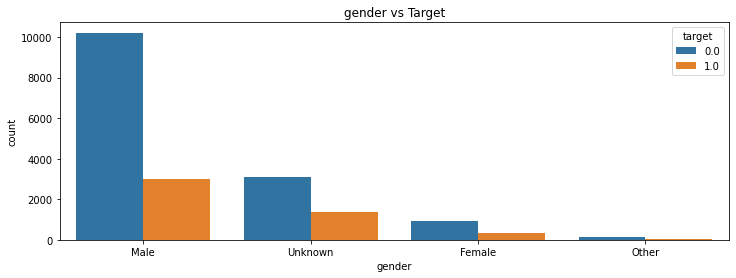

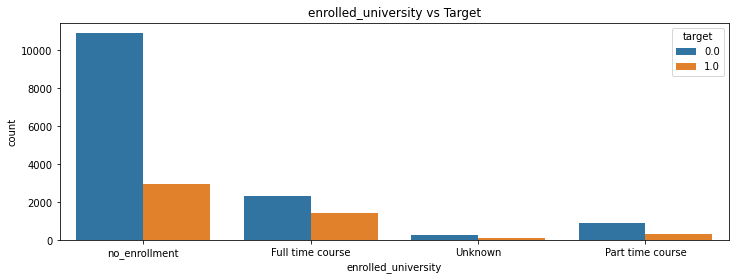

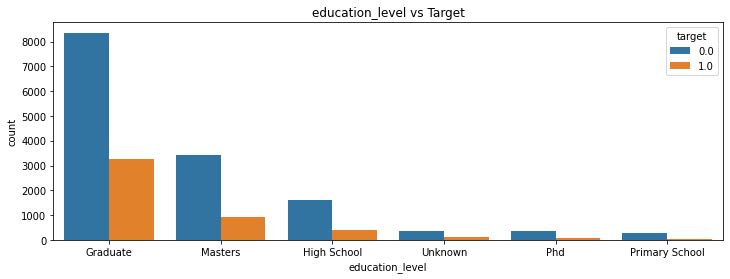

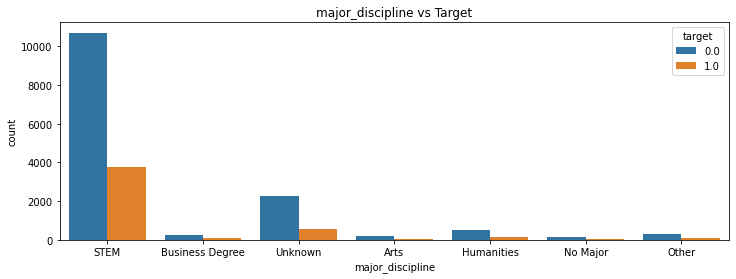

In [ ]:
plotsa1(['gender','enrolled_university','education_level','major_discipline'])

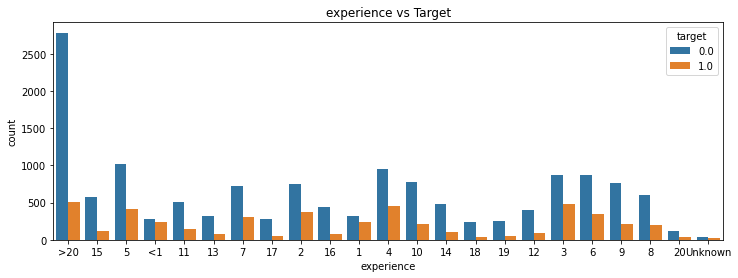

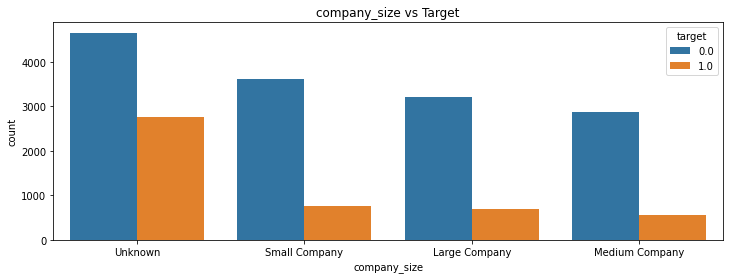

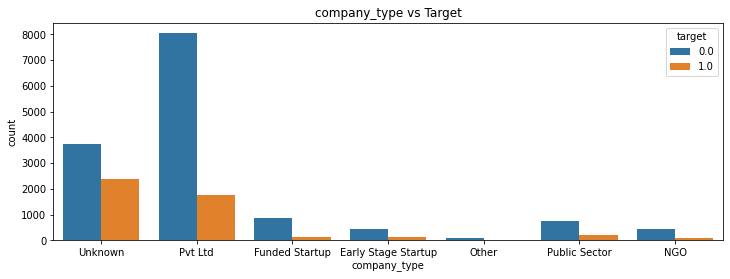

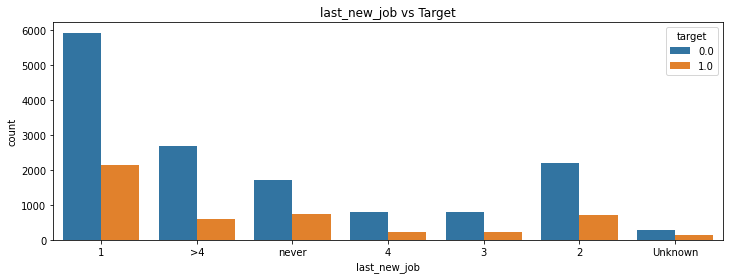

In [ ]:
plotsa1(['experience','company_size','company_type','last_new_job'])

From the graphs above we can conclude, only for the variables company_size and company_type does the unknown value play an impact.

## 1.2 Data Cleaning
Drop the null observations in specific columns: 
* gender, 
* relevent_experience, 
* enrolled_university, 
* education_level, 
* major_discipline, 
* experience, 
* lastnewjob

In [ ]:
df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')
df_Clean['company_size'].replace({'10/49':'10-49'}, inplace=True)

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size              0
dtype: int64

# 2. Exploratory Data Analysis 



## 1. Demographics:
    1. Gender
    2. City (city, CDI)
    3. Education (major_discipline, enrolled_university, education_level)
    4. Job history (experience, relevent_experience, last_new_job)

### 1.1 Gender
#### 1.1.1 Is the hiring of data scientists gender biased? What is the impact of gender on attrition?

In [ ]:
def pie_plt(category, dataframe):    ## Function to create pie plot, takes input as list of features and dataframe

  for cat in category:
    values_m = dataframe[cat].value_counts()
    labels_m = values_m.index
    plt.subplots(figsize = (12,8))

    plt.pie(values_m, labels=labels_m,  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        ,explode=(0.1, 0.1, 0.1), autopct='%0.2f%%')
    plt.title('Hiring of Data Scientist by Gender at Company')
    plt.show()

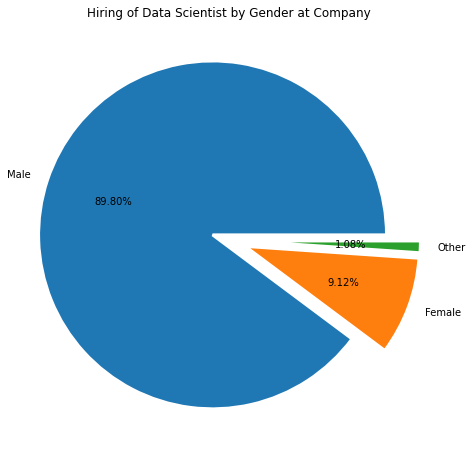

In [ ]:
## PLotting a pie chart for hiring of DS by gender
pie_plt(['gender'], df_Clean)

Approximately 90% of the hires are male, demonstating a bias in the hiring of DS at this company, the industry average of male DS in USA is 65% according to the below source.

https://www.zippia.com/data-scientist-jobs/demographics/

In [ ]:
def norm_cnt_plt(category, dataframe):  ## This function takes in a list of features and plots a normalized count plot against the target variable

  for cat in category:

    x,y = cat, 'target'
    df1 = dataframe.groupby(x)[y].value_counts(normalize=True) # Grouping by feature, and target variable, then normalizing it
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    ax =  sns.catplot(x=x,y='percent',hue=y, kind='bar',data=df1)  # Plotting the graph
    plt.xticks(rotation= 45)
    plt.title(cat + ' vs Target')
    plt.show()

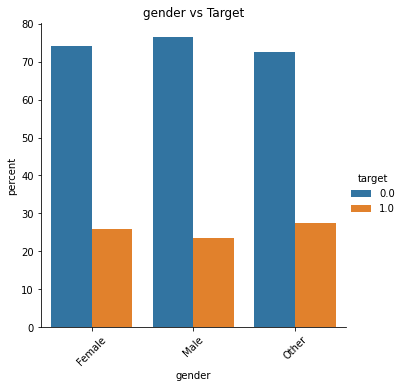

In [ ]:
## Checking the impact of attrition on gender using a normalized bar plot.
norm_cnt_plt(['gender'], df_Clean)

From the above graph gender seems to have no impact on attrition.

### 1.2 City

CDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).

In [ ]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df_Clean['cdi_bucket'] = pd.cut(df_Clean['city_development_index'], bins = cdi_bins, labels = cdi_labels)

#### 1.2.1 Which are the top 10 cities the company hires from? and their corresponding CDI. (the higher the CDI, the more urban the city is)

In [ ]:
df_Clean.groupby(['city','city_development_index','cdi_bucket'], as_index= False)['enrollee_id'].count()   \
                  .sort_values(by = 'enrollee_id',ascending = False).head(10).reset_index(drop = True).rename(columns={"enrollee_id": "count"})

,city,city_development_index,cdi_bucket,count
0,city_103,0.920,very_high_human_development,3262.0
1,city_21,0.624,medium_human_development,1480.0
2,city_16,0.910,very_high_human_development,1093.0
3,city_114,0.926,very_high_human_development,801.0
4,city_160,0.920,very_high_human_development,619.0
5,city_136,0.897,very_high_human_development,405.0
6,city_67,0.855,very_high_human_development,277.0
7,city_75,0.939,very_high_human_development,218.0
8,city_104,0.924,very_high_human_development,190.0
9,city_102,0.804,very_high_human_development,190.0


Company hires mainly from very high human development cities, with majority of the candidates coming from city_103. The only exception is city_21 which is the 2nd highest in terms of hiring but has medium CDI, it can be possible this is a University Town.

#### 1.2.2 How is CDI correlated with an individual’s education level?

In [ ]:
## Since CDI is a numeric variable and Education level is categorical using anova to calculate corelation
df_cdi_edu = df_Clean[['education_level','city_development_index']]

In [ ]:
# f_oneway() function takes the df_cdi_edu as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between City Development Index and Education Level
# Assumption(H0) is that City Development Index and Education level are NOT correlated
 
# Finds out the CDI data for each education level as a list
CategoryGroupLists = df_cdi_edu.groupby('education_level')['city_development_index'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.8604593860651103e-18


Since the P-value is less than 0.05, we can reject the null H0, and conclude there is a correlation between CDI and education level

Citation : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

In [ ]:
################################   IMPORTANT INTERNAL ################################

print(df['education_level'].unique())
print(df_Clean['education_level'].unique())

['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['Graduate' 'Masters' 'Phd']


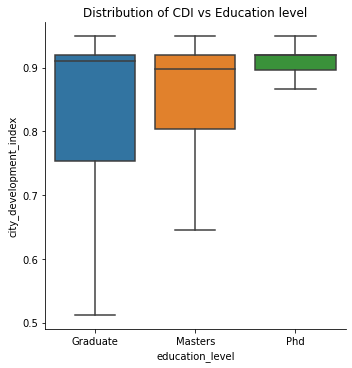

In [ ]:
## Plottting a Boxplot to check the distribution 

sns.catplot(x="education_level", y="city_development_index", kind="box", data=df_cdi_edu, showfliers = False).set(title='Distribution of CDI vs Education level');

In general, the candidates with higher qualifications belong to cities with higher CDI.

#### 1.2.3 Relationship between CDI and city code

In [ ]:
df_Clean.groupby('cdi_bucket', as_index=False)['city'].nunique().rename(columns={'city':'Number of cities'})   \
                .sort_values(by = 'Number of cities', ascending = False).reset_index(drop=True)

,cdi_bucket,Number of cities
0,very_high_human_development,47
1,medium_human_development,36
2,high_human_development,28
3,low_human_development,9


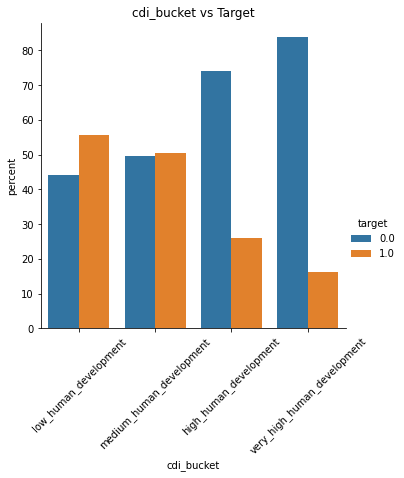

In [ ]:
### Impact of CDI on attrition  using a normalized bar plot.
norm_cnt_plt(['cdi_bucket'], df_Clean)

Candidates from cities with lower and medium development index are more likely to look for a change.

### 1.3 Education

#### 1.3.1 What are the top 5 education backgrounds for the data scientist (based on major discipline)

In [ ]:
df_Clean.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [ ]:
# import the circlify library
import circlify
values_e = df_Clean["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_Clean["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

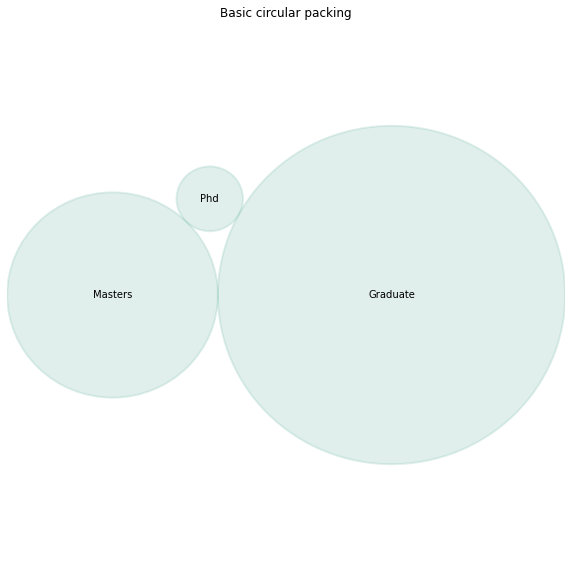

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="#69b3a2",linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

The candidates mostly have undergraduate education background, and small portion of the candidates has Phd. 

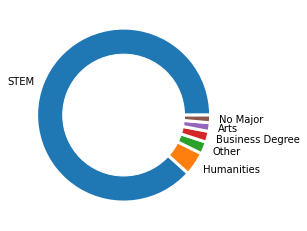

In [ ]:
# donut chart 
# create data
values_m = df_Clean["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Most of the enrollees major in STEM, which is reasonable because the company is hiring data scientists. 

#### 1.3.2 What are some education characteristics for those candidates who are staying?

In [ ]:
df_education = df_Clean[["target","enrolled_university", "education_level", "major_discipline"]]

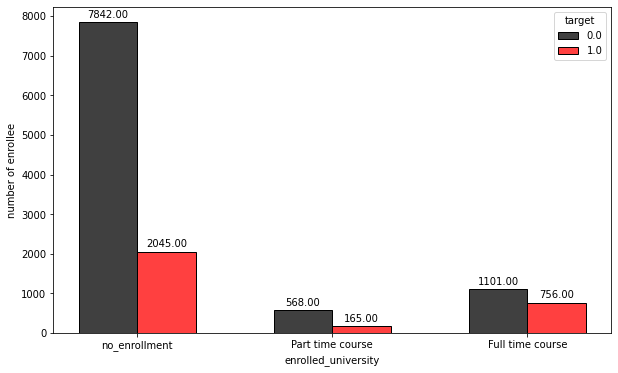

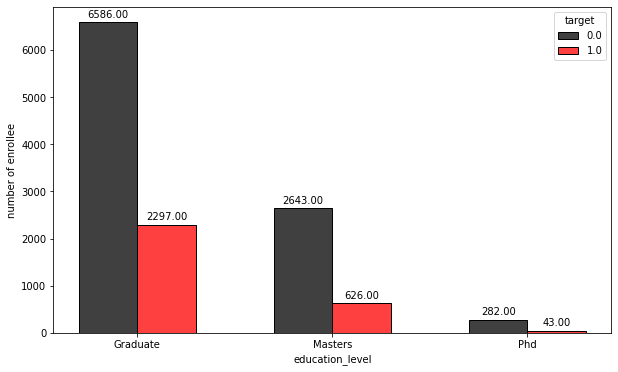

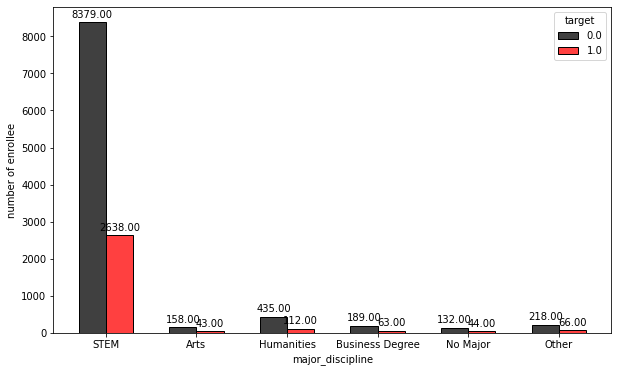

In [ ]:
for i in df_education.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"black",1:"red"}   
  plots = sns.histplot(data = df_Clean,x=i,hue="target",palette=hue_colors, multiple="dodge", shrink = 0.6)
  # Iterrating over the bars one-by-one
  for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.show()

Text(0, 0.5, 'number of candidates')

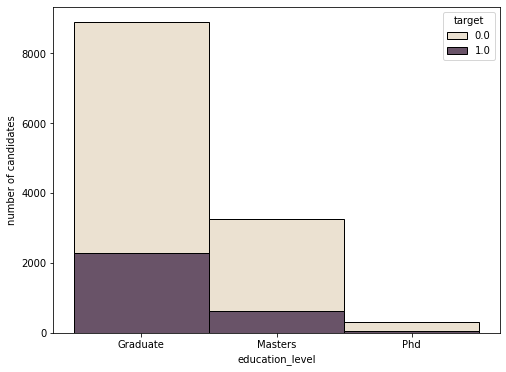

In [ ]:
%matplotlib inline
plt.figure(figsize=[8,6])
sns.histplot(binwidth=1, x="education_level", hue="target", data=df_Clean, palette="ch:.25", stat="count", multiple="stack")
plt.ylabel("number of candidates")

* Master candidates who decide to stay have larger portion. 
* Candidates who have no enrollment or enroll in part-time course tend to stay in the company. 
* STEM majored candidates have higher chance to stay.

 



### 1.4 Job History

#### 1.4.1 No Gap/Yes Gap: will the gap years of jobs affect whether a candidate is staying or leaving?

In [ ]:
# First see the portion of the duration of job gap
ep = df_Clean['last_new_job'].value_counts().reset_index()
ep.columns = [
    'last_new_job', 
    'percent'
]
ep['percent'] /= len(df)
fig = px.pie(
    ep, 
    names='last_new_job', 
    values='percent', 
    title='Last_new_job', 
    width=800,
    height=500 
)

fig.show()

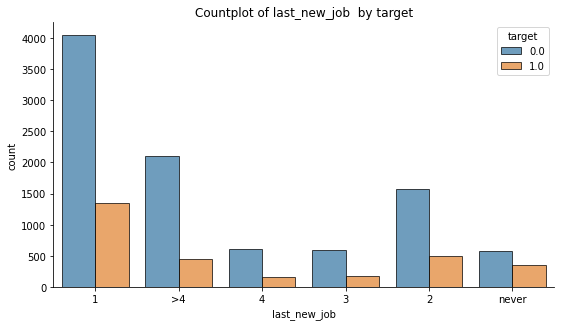

In [ ]:
# Then plot the last_new_job towards target to see the difference
plt.figure(figsize=[15,17])
plot=["last_new_job"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

According to these plot, we can easily tell that when the gap year(s) between last and new is(are) 1 or 2, the ratio between leave and stay is 1:3. When the gap duration increases to 3, 4 or even more than 4, the ratio of leave and stay decreases to 1:4. This means if the last job and new job gap turns longer, more candidates tend to stay in this Big Data company correspondingly.

However, when we come to candidates never change their job -- the 'never' group, we can see that the ratio between leave and stay are 1:2, which means least candidates in this group will stay in this company rather than their original ones.

This will give HR a hint: When recruiting candidates to join this program, we can turn to candidates with longer gap beween last job and new one. However, not the ones who never change their job, those may experience nostalgia and don't want any change.

#### 1.4.2 Is the hiring of Data Scientists impacted by their previous experience? 

In [ ]:
# Set bins for experience to make the graph clearer
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['<1','1','2','3','4','5']), 'Primary Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['6','7','8','9','10']), 'Little Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['11','12','13','14','15']), 'Have Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['16','17','18','19','20','>20']), 'Many Experience',df_Clean['experience'])

In [ ]:
# First see the portion of experiecne
ep = df_Clean['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(df_Clean)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

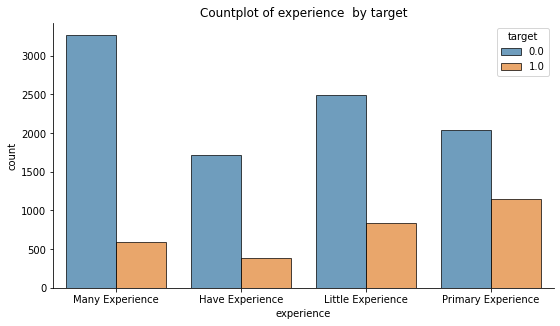

In [ ]:
# Then plot different groups by target to see the result
plt.figure(figsize=[15,17])
plot=["experience"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

This graph, from the left hand side to the right, candidates have fewer working experiecne. We can easily tell that group with more experience, candidates tend to stay in Big Data company after training. And this trend is monotonical.

This gives HR the hint -- Candidates with more experience joining this program will tend to stay.

#### 1.4.3 Does the type of the candidate's current company affect his decision? 

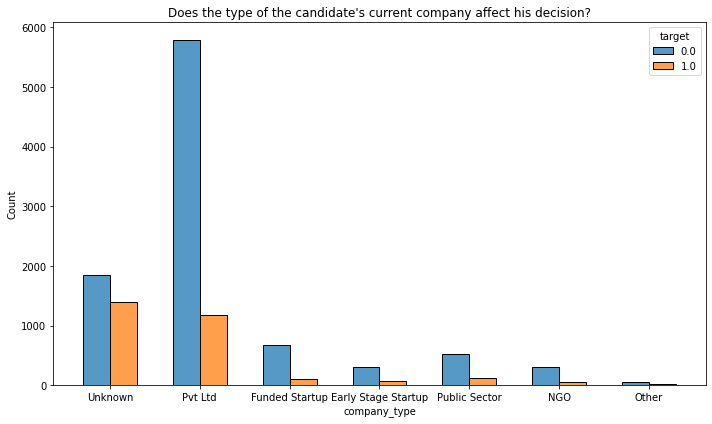

In [ ]:
plt.figure(figsize=[10,6])
categories=["company_type"]
n=1
for f in categories:
    sns.histplot(data = df_Clean,x=f,hue="target",multiple="dodge", shrink = 0.6)
    plt.title("Does the type of the candidate's current company affect his decision?")
    n=n+1
plt.tight_layout()
plt.show()

It seems like candidates from private companies tend to stay with the "company" after training. However, 75% of the candidates come from private companies. We need to further investigate into why most data scientist candidates come from a private company. Is there a reason? Maybe "company" should focus its efforts into targeting only that company type. We could isolate those who come from pvt ltd.

#### 1.4.4 Does the size of the candidate's current company affect his decision? 

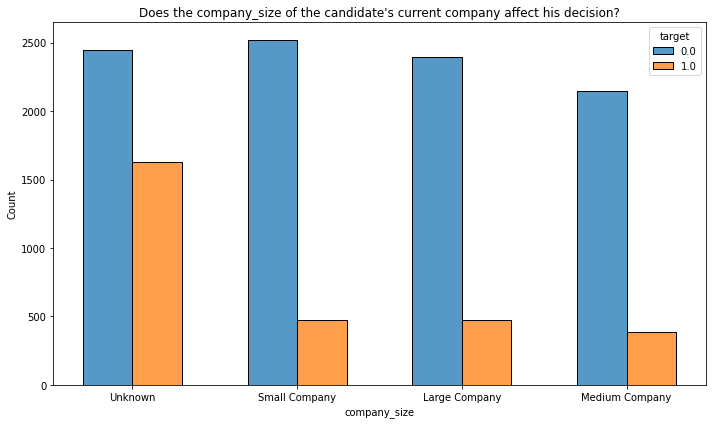

In [ ]:
plt.figure(figsize=[10,6])
sns.histplot(data = df_Clean,x="company_size",hue="target",multiple="dodge", shrink = 0.6)
plt.title("Does the {} of the candidate's current company affect his decision?".format("company_size"))

plt.tight_layout()
plt.show()

When comparing the sizes of the candidates' current companies, the candidates coming from small companies tend to stay with the "company" after training the most. However, there is not a clear relationship between the company size and the candidate's decision to stay after training.

#### 1.4.5 What type of company do most company hires come from?

In [ ]:
fig = px.pie(df_Clean['company_type'].value_counts(), values='company_type', 
             names = df_Clean['company_type'].value_counts().index,title = 'What is the most prevalent company type in the dataset?',
             template='ggplot2'
            )
fig.show()

Most candidates come from private limited companies.

#### 1.4.6 What company size do most candidates come from?

In [ ]:
fig = px.pie(df_Clean['company_size'].value_counts(), values='company_size', 
             names = df_Clean['company_size'].value_counts().index,title = 'What is the most prevalent company size in the dataset?',
             template='ggplot2')
fig.show()

Not a clear winner; hires come from different size companies.

## 2. Engagement and Retention

### 2.1 How much training hours does the company invest in its future employees?

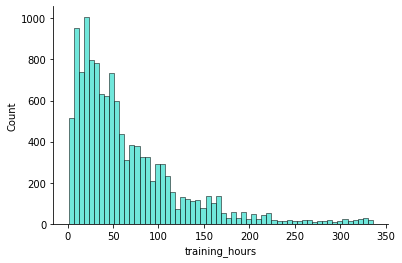

In [ ]:
# We can plot a histogram of training hours
sns.histplot(data=df_Clean, x="training_hours", color = 'turquoise')
sns.despine()

In [ ]:
df_Clean['training_hours'].median()

47.0

Distribution is right skewed. On average, the company spends approximately 47 hours training its future employees.

#### 2.1.1 Will candidates enrolled in university experience longer or shorter training hours?

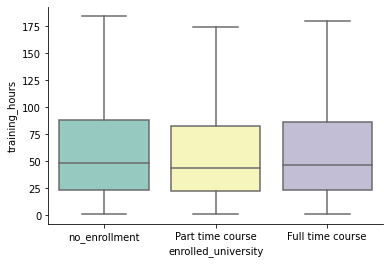

In [ ]:
sns.boxplot(x="enrolled_university", y="training_hours",
                 data= df_Clean, palette="Set3", showfliers = False)
sns.despine()

The distribution is quite similar for all three enrolled university categories. However, no_enrollment seems to have slightly higher training hours compared to those of the other two. This makes sense as people who are not enrolled in university may have more time for training. 

#### 2.1.2 Does company size affect the number of training hours? 

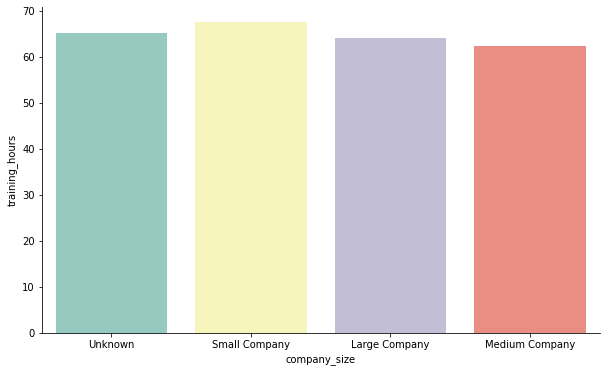

In [ ]:
plt.figure(figsize=[10,6])

sns.barplot(x="company_size", y="training_hours",
                 data= df_Clean, palette="Set3", ci = None)
sns.despine()

Small company tends to have higher training hours compared to the others, which makes sense considering the fact that people from smaller companies may not have as much experience compared to people from larger and more established companies. 

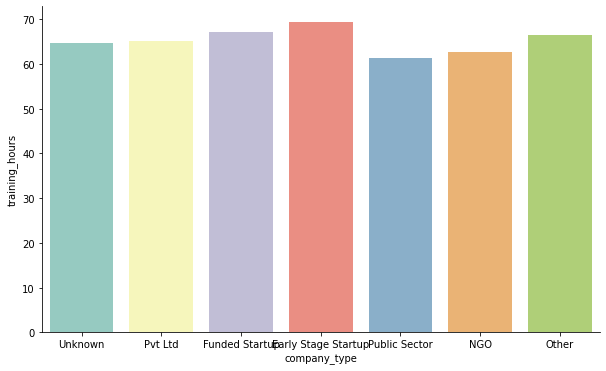

In [ ]:
# Does company type affect the number of training hours?
plt.figure(figsize=[10,6])

sns.barplot(x="company_type", y="training_hours",
                 data= df_Clean, palette="Set3", ci = None)
sns.despine()

Startups have highest training hours, followed by pvt and NGO, and public sector has lowest training hours. 

**Graphs Pertaining to Target Variable**

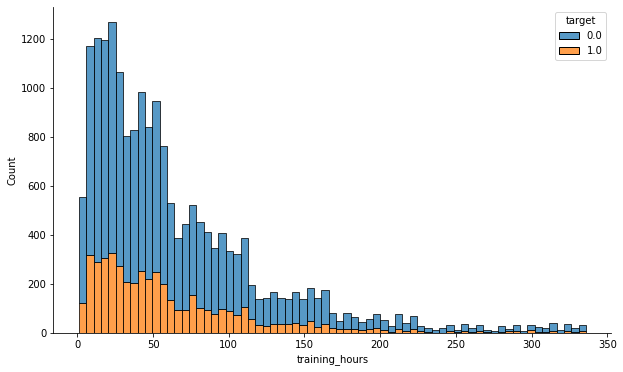

In [ ]:
# Graph of training hours with target
plt.figure(figsize=[10,6])
sns.histplot(data=df, x="training_hours", hue="target", multiple="stack")
sns.despine()

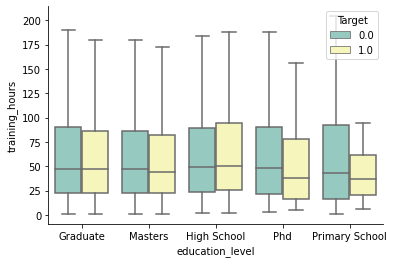

In [ ]:
# Graph of training hours with education level, split by target

sns.boxplot(x="education_level", y="training_hours", hue="target",
                 data=df, palette="Set3", showfliers = False)
plt.legend(loc='upper right', title='Target')
sns.despine()

#### 2.1.3 How long should the candidates get trained if the STEM candidates have relevant experience?

In [ ]:
# Set new conditions and values to match & save to a new column
condition = [
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience')
]

In [ ]:
values = ['STEM_rel', 'STEM_nonrel', "Non_STEM_rel", "Non_STEM_nonrel"]

In [ ]:
df_Clean['educational_condition'] = np.select(condition, values)
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size,cdi_bucket,educational condition,educational_condition
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,Many Experience,Unknown,1,36,1.0,Unknown,very_high_human_development,STEM_rel,STEM_rel
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,Have Experience,Pvt Ltd,>4,47,0.0,Small Company,high_human_development,STEM_nonrel,STEM_nonrel
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,Many Experience,Funded Startup,4,8,0.0,Small Company,high_human_development,STEM_rel,STEM_rel
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,Have Experience,Pvt Ltd,>4,18,1.0,Small Company,high_human_development,STEM_rel,STEM_rel
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,Little Experience,Pvt Ltd,1,46,1.0,Small Company,very_high_human_development,STEM_rel,STEM_rel


##### 2.1.3.1 Educational Condition by target

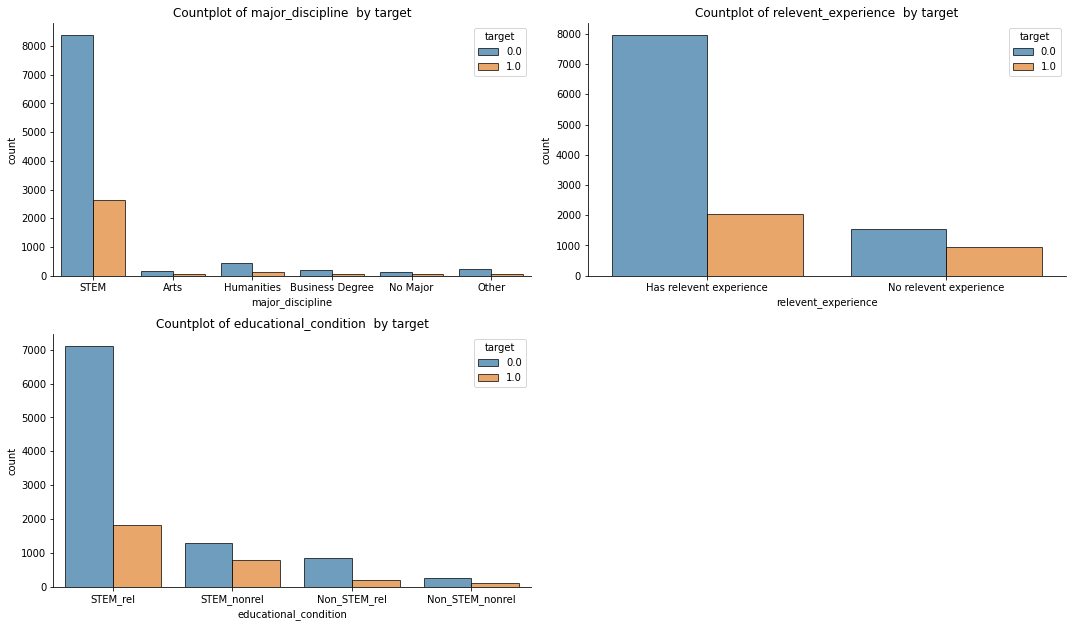

In [ ]:
# Plot the educational condition by target to see the different
plt.figure(figsize=[15,17])
plot=["major_discipline", "relevent_experience", "educational_condition"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Through this plot, it is undeniable that candidates with relevent experiecne tend to stay in this company, especially when we compare 'relevent' with 'non_relevent' groups.

##### 2.1.3.1 Educational Condition by training hours

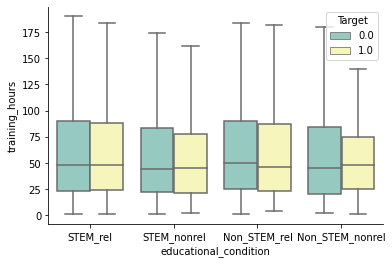

In [ ]:
sns.boxplot(x="educational_condition", y="training_hours", hue="target",
                 data=df_Clean, palette="Set3", showfliers = False)
plt.legend(loc='upper right', title='Target')
sns.despine()

Rationale : ??

### 2.2 Is it a fact that: the longer the candidate is being trained, the higher chance he/she will stay? How should we adjust the training hours as a HR?

In [ ]:
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(0,51)), "a).0-50", "Unknown")
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(51,101)), "b).50-100",df_Clean['training_hours_range'])
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(101,151)), "c).100-150",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(151,201)), "d).150-200",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(201,251)), "e).200-250",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(251,301)), "f).250-300",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(301,351)), "g).300-350",df_Clean['training_hours_range'] )
df_Clean=df_Clean.sort_values('training_hours_range', ascending=True)

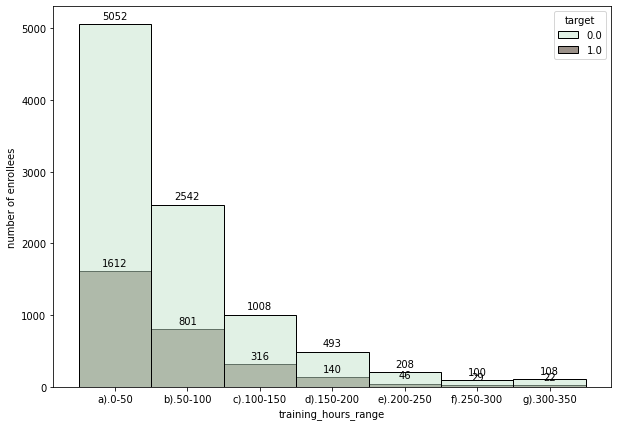

In [ ]:
# How much training hours does the company invest in its future employees? we can plot a histogram of training hours.)
plt.figure(figsize=[10,7])
plots_thrs = sns.histplot(data=df_Clean, x='training_hours_range', hue="target", palette="ch:10")

  # Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), 'd'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.ylabel("number of enrollees")
plt.show()

Based on the hisplot for training hours, we can observe that it's not necessary that the more time the candidate is being trained, the higher chance he/she will stay. From a HR perspective, 50-150hrs training hour range has higher percentage of retention about 76%. It's the ideal range for the employees. 

100-150:76.1%
50-100: 76.04%

### 2.3 Do people with higher education levels affect the company size and type they work in?

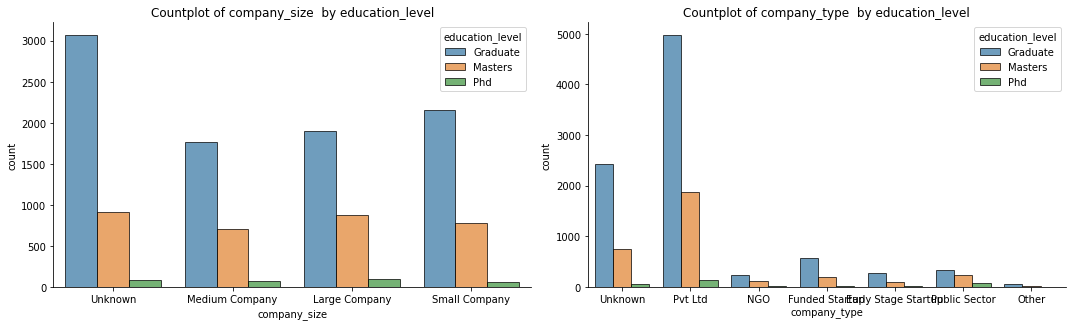

In [ ]:
plt.figure(figsize=[15,17])
categories=["company_size", "company_type"]
n=1
for f in categories:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Rationale: ???

# Cleaning Prelim

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')
df_Clean = df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
df2 = df.fillna('Unknown')

In [ ]:
df2.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    # a calculates the height of each count value of each bar  
    a = [p.get_height() for p in plot.patches]
    
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
def plotsa1(category):

  for cat in category:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=cat, hue='target', data=df)
    plt.title(cat + ' vs Target')
    ######################
    with_hue(ax, df[cat], df[cat].nunique(), df.target.nunique())

In [ ]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')>

gender                    4508 
enrolled_university        386
education_level            460
major_discipline          2813

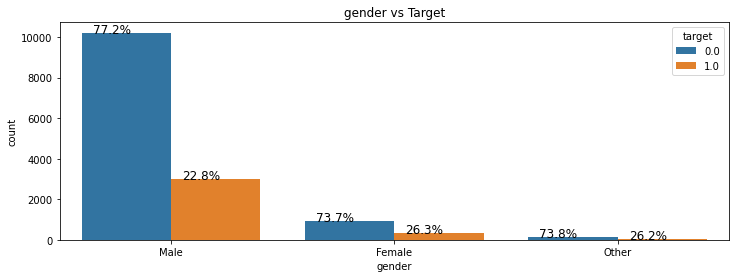

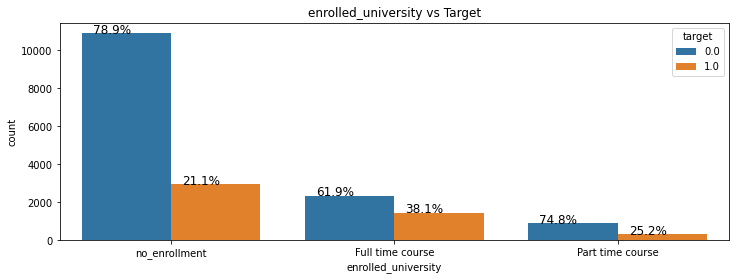

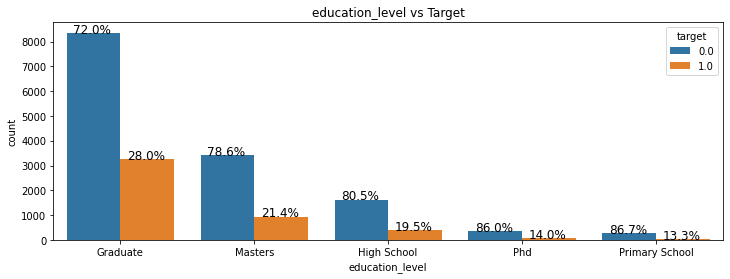

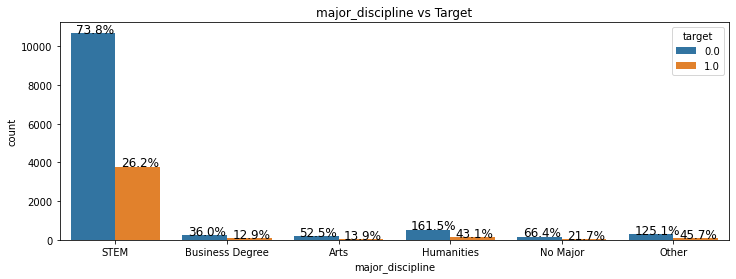

In [ ]:
plotsa1(['gender','enrolled_university','education_level','major_discipline'])

experience                  65
company_size              5938
company_type              6140
last_new_job               423

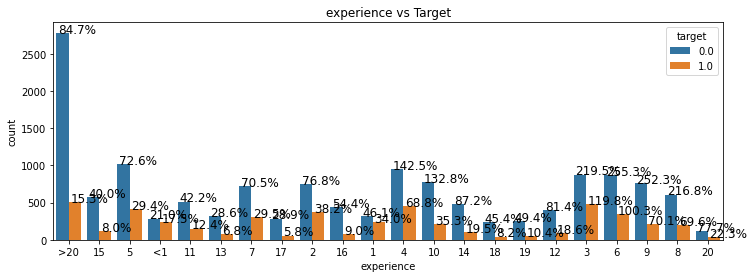

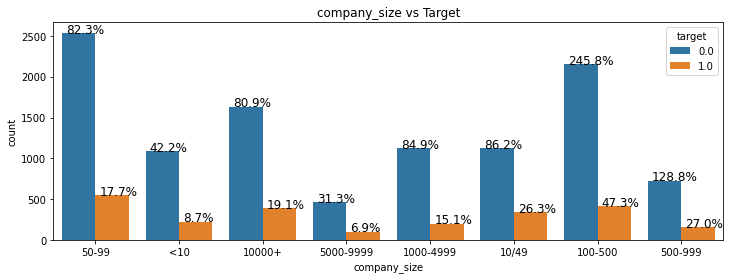

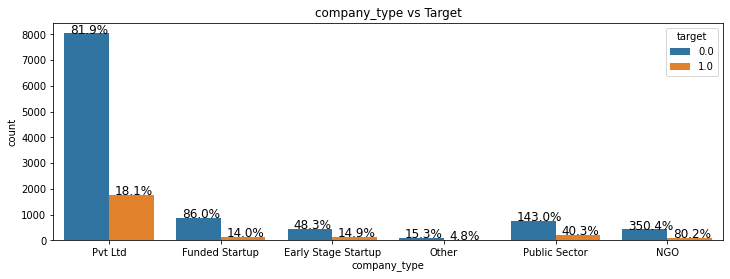

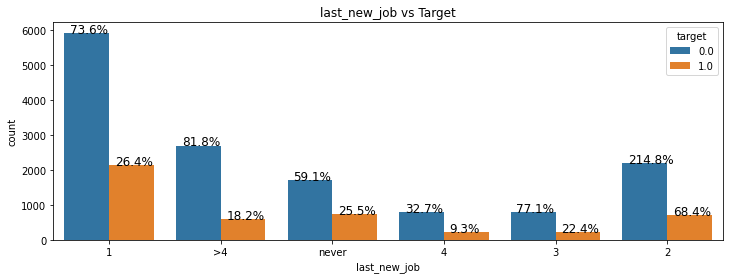

In [ ]:
plotsa1(['experience','company_size','company_type','last_new_job'])

#Caroline Lun Notebook
Enrolled_university, education_level, major_discipline


In [ ]:
pip install squarify 

In [ ]:
pip install circlify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify
#import missingno as msno

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
for i in df:
  print(i, df[i].isnull().sum())


enrollee_id 0
city 0
city_development_index 0
gender 4508
relevent_experience 0
enrolled_university 386
education_level 460
major_discipline 2813
experience 65
company_size 5938
company_type 6140
last_new_job 423
training_hours 0
target 0


In [ ]:
df = df[df['gender'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             14650 non-null  int64  
 1   city                    14650 non-null  object 
 2   city_development_index  14650 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     14650 non-null  object 
 5   enrolled_university     14437 non-null  object 
 6   education_level         14391 non-null  object 
 7   major_discipline        12672 non-null  object 
 8   experience              14634 non-null  object 
 9   company_size            10337 non-null  object 
 10  company_type            10217 non-null  object 
 11  last_new_job            14576 non-null  object 
 12  training_hours          14650 non-null  int64  
 13  target                  14650 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# Visualize missingness
msno.matrix(df)
plt.show()

NameError: ignored

In [ ]:
df_cl = df[["target","enrolled_university", "education_level", "major_discipline"]]

In [ ]:
df_cl

In [ ]:
df_cl.info()

In [ ]:
df_cl.describe()

In [ ]:
for i in df_cl:
  df_cl[i].fillna("Unknown", inplace=True)

In [ ]:
df_cl.info()

In [ ]:

df_cl.head()

In [ ]:
for i in df_cl.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"black",1:"red"}   
  plots = sns.histplot(data = df_cl,x=i,hue="target",palette=hue_colors, multiple="dodge", shrink = 0.6)
  # Iterrating over the bars one-by-one
  for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.show()


In [ ]:
for i in df_cl:
  print(df_cl[i].groupby(df_cl["target"]).value_counts())
  

In [ ]:
%matplotlib inline
plt.figure(figsize=[10,7])
sns.histplot(binwidth=1, x="education_level", hue="target", data=df_cl, palette="ch:.25", stat="count", multiple="stack")

In [ ]:
# donut chart 
# create data
values_m = df_cl["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:

# Tree map 
values_u = df_cl["enrolled_university"].value_counts()
labels_u = values_u.index
squarify.plot(sizes=values_u, label=labels_u, alpha=0.8 )
plt.axis('off')
plt.show()

In [ ]:

# import the circlify library
import circlify
values_e = df_cl["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_cl["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="#69b3a2",linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

# Caroline L New Notebook

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean.company_size.unique()

array(['Unknown', 'Small Company', 'Large Company', 'Medium Company'],
      dtype=object)

##What are the top 5 education backgrounds for the data scientist (based on major discipline) 

In [ ]:
df_Clean.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [ ]:
# import the circlify library
import circlify
values_e = df_Clean["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_Clean["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

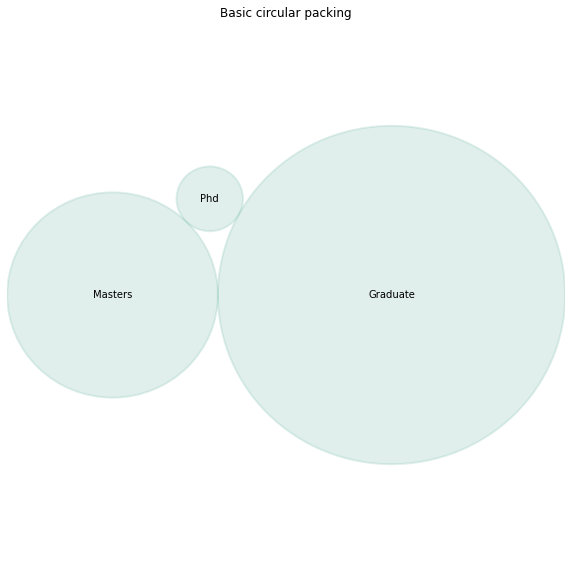

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="#69b3a2",linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

The candidates mostly have undergraduate education background, and small portion of the candidates has Phd. 

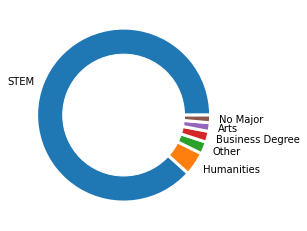

In [ ]:
# donut chart 
# create data
values_m = df_Clean["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Most of the enrollees major in STEM, which is reasonable because the company is hiring data scientists. 

##What are some education characteristics for those candidates who are staying? 

In [ ]:
df_education = df_Clean[["target","enrolled_university", "education_level", "major_discipline"]]

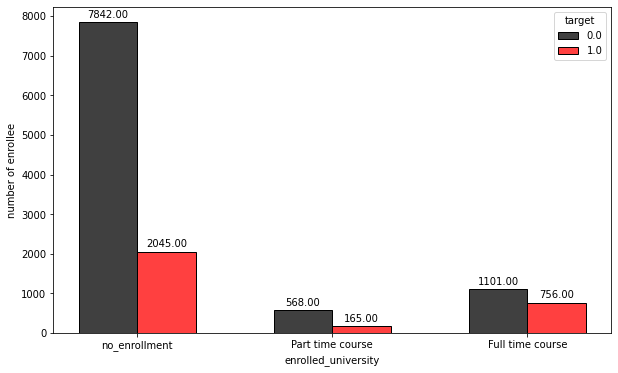

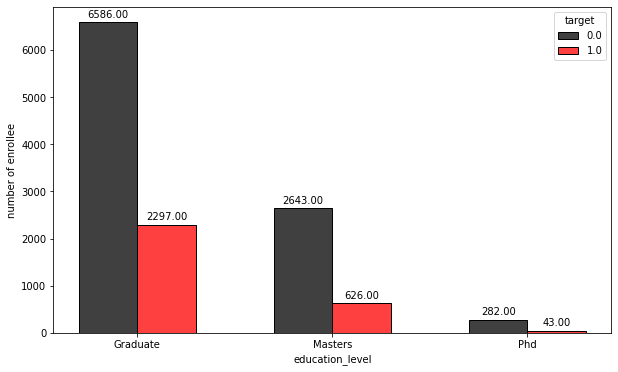

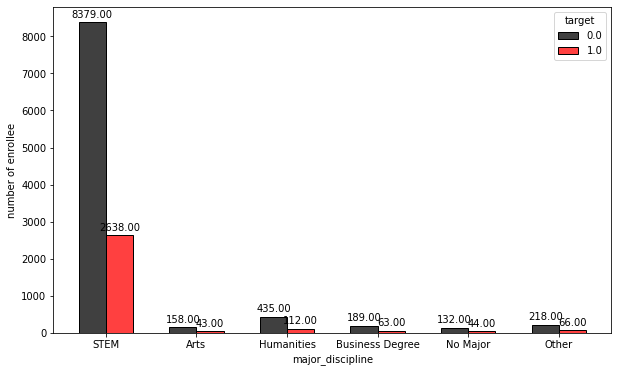

In [ ]:
for i in df_education.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"black",1:"red"}   
  plots = sns.histplot(data = df_Clean,x=i,hue="target",palette=hue_colors, multiple="dodge", shrink = 0.6)
  # Iterrating over the bars one-by-one
  for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.show()

Text(0, 0.5, 'number of candidates')

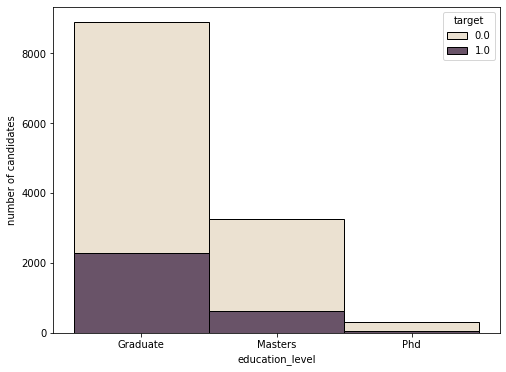

In [ ]:
%matplotlib inline
plt.figure(figsize=[8,6])
sns.histplot(binwidth=1, x="education_level", hue="target", data=df_Clean, palette="ch:.25", stat="count", multiple="stack")
plt.ylabel("number of candidates")

* Master candidates who decide to stay have larger porption. 
* Candidates who have no enrollment or enroll in part-time course tend to stay in the company. 
* STEM majored candidates have higher chance to stay.

 



##Is it a fact that: the longer the candidate is being trained, the higher chance he/she will stay? How should we adjust the training hours as a HR? 

In [ ]:
df_Clean["training_hours"]

0        36
1        47
4         8
7        18
8        46
         ..
19150    23
19152    25
19153    42
19154    52
19155    44
Name: training_hours, Length: 12477, dtype: int64

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(0,51)), "a).0-50", "Unknown")
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(51,101)), "b).50-100",df_Clean['training_hours_range'])
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(101,151)), "c).100-150",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(151,201)), "d).150-200",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(201,251)), "e).200-250",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(251,301)), "f).250-300",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(301,351)), "g).300-350",df_Clean['training_hours_range'] )
df_Clean=df_Clean.sort_values('training_hours_range', ascending=True)

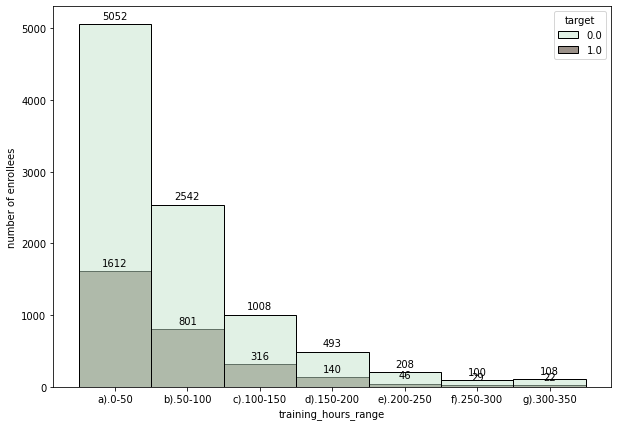

In [ ]:
# How much training hours does the company invest in its future employees? we can plot a histogram of training hours.)
plt.figure(figsize=[10,7])
plots_thrs = sns.histplot(data=df_Clean, x='training_hours_range', hue="target", palette="ch:10")

  # Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), 'd'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.ylabel("number of enrollees")
plt.show()

Based on the hisplot for training hours, we can observe that it's not necessary that the more time the candidate is being trained, the higher chance he/she will stay. From a HR perspective, 50-150hrs training hour range has higher percentage of retention about 76%. It's the ideal range for the employees. 

100-150:76.1%
50-100: 76.04%

# Aash Notebook
CDI, Gender


In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
for x,y in enumerate(df.columns.values.tolist()):
  print(df[y].unique())
print(df.nunique())

In [ ]:
df[['last_new_job','last_new_job']].unique()

In [ ]:
df.columns.values.tolist()

In [ ]:
df.shape

In [ ]:
df2 = df.dropna()
df2.shape


In [ ]:
df['last_new_job'].unique()

In [ ]:
df3= df.dropna(axis=0, subset=['gender'])

In [ ]:
df3.isnull().sum()

In [ ]:
df3.groupby('enrolled_university').agg({'enrolled_university':'count'})

In [ ]:
df3['enrolled_university'].unique()

In [ ]:
df3['enrolled_university'].isnull().sum()

## Analyzing Gender


In [ ]:
df_gender = df[['gender']]
print(df_gender.info())

In [ ]:
df_gender.isnull().sum()

gender has 4.5k null values

## Analyzing CDI

In [ ]:
df_cdi = df[['city_development_index']]

In [ ]:
df_cdi.info()

In [ ]:
df_cdi.isnull().sum()

CDI has no null values

## Missing Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [ ]:
msno.matrix(df, figsize = (12, 8), fontsize =10);

## Filling Gender Null and Viz

In [ ]:
df['gender'] = df['gender'].fillna('DNM')

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    # a calculates the height of each count value of each bar  
    a = [p.get_height() for p in plot.patches]
    
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
def plotsa1(category):

  for cat in category:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=cat, hue='target', data=df)
    plt.title(cat + ' vs Target')
    ######################
    with_hue(ax, df[cat], df[cat].nunique(), df.target.nunique())

In [ ]:
plotsa1(['gender'])

22 percent of males look for a change, as compared to 26 percent of females.

### Viz for CDI

In [ ]:
df['city_development_index'].describe()

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).


In [ ]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df['cdi_bucket'] = pd.cut(df['city_development_index'], bins = cdi_bins, labels = cdi_labels)

In [ ]:
plotsa1(['cdi_bucket'])

Candidates from cities with lower and medium development index are more likely to look for a change, however this can be biased since we dont have a lot of data for this.

In [ ]:
df['cdi_bucket'].nunique()

#Aash new

## Gender

1.1.1) Is the hiring of data scientists gender biased? What is the impact of gender on attrition?

In [ ]:
def pie_plt(category, dataframe):    ## Function to create pie plot, takes input as list of features and dataframe

  for cat in category:
    values_m = dataframe[cat].value_counts()
    labels_m = values_m.index
    plt.subplots(figsize = (12,8))

    plt.pie(values_m, labels=labels_m,  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        ,explode=(0.1, 0.1, 0.1), autopct='%0.2f%%')
    plt.title('Hiring of Data Scientist by Gender at Company')
    plt.show()

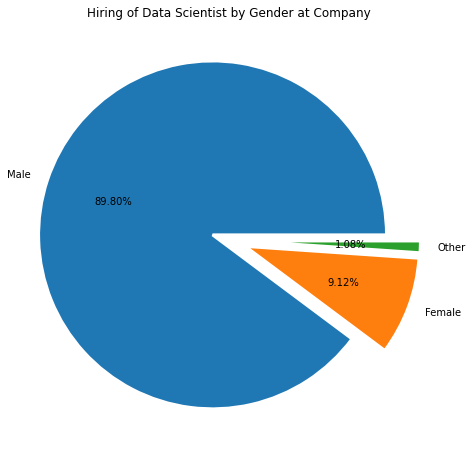

In [ ]:
## PLotting a pie chart for hiring of DS by gender
pie_plt(['gender'], df_Clean)

Approximately 90% of the hires are male, demonstating a bias in the hiring of DS at this company, the industry average of male DS in USA is 65% according to the below source.

https://www.zippia.com/data-scientist-jobs/demographics/

In [ ]:
def norm_cnt_plt(category, dataframe):  ## This function takes in a list of features and plots a normalized count plot against the target variable

  for cat in category:

    x,y = cat, 'target'
    df1 = dataframe.groupby(x)[y].value_counts(normalize=True) # Grouping by feature, and target variable, then normalizing it
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    ax =  sns.catplot(x=x,y='percent',hue=y, kind='bar',data=df1)  # Plotting the graph
    plt.xticks(rotation= 45)
    plt.title(cat + ' vs Target')
    plt.show()

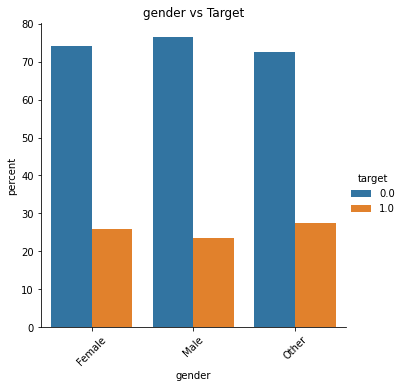

In [ ]:
## Checking the impact of attrition on gender using a normalized bar plot.
norm_cnt_plt(['gender'], df_Clean)


From the above graph gender seems to have no impact on attrition.

## City

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).

In [ ]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df_Clean['cdi_bucket'] = pd.cut(df_Clean['city_development_index'], bins = cdi_bins, labels = cdi_labels)

1.2.1) Which are the top 10 cities the company hires from? and their corresponding CDI. (the higher the CDI, the more urban the city is)

In [ ]:
df_Clean.groupby(['city','city_development_index','cdi_bucket'], as_index= False)['enrollee_id'].count()   \
                  .sort_values(by = 'enrollee_id',ascending = False).head(10).reset_index(drop = True).rename(columns={"enrollee_id": "count"})

,city,city_development_index,cdi_bucket,count
0,city_103,0.920,very_high_human_development,3262.0
1,city_21,0.624,medium_human_development,1480.0
2,city_16,0.910,very_high_human_development,1093.0
3,city_114,0.926,very_high_human_development,801.0
4,city_160,0.920,very_high_human_development,619.0
5,city_136,0.897,very_high_human_development,405.0
6,city_67,0.855,very_high_human_development,277.0
7,city_75,0.939,very_high_human_development,218.0
8,city_104,0.924,very_high_human_development,190.0
9,city_102,0.804,very_high_human_development,190.0


Company hires mainly from very high human development cities, with majority of the candidates coming from city_103. The only exception is city_21 which is the 2nd highest in terms of hiring but has medium CDI, it can be possible this is a University Town.

1.2.2) How is CDI correlated with an individual’s education level?

In [ ]:
## Since CDI is a numeric variable and Education level is categorical using anova to calculate corelation

df_cdi_edu = df_Clean[['education_level','city_development_index']]

In [ ]:
# f_oneway() function takes the df_cdi_edu as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between City Development Index and Education Level
# Assumption(H0) is that City Development Index and Education level are NOT correlated
 
# Finds out the CDI data for each education level as a list
CategoryGroupLists = df_cdi_edu.groupby('education_level')['city_development_index'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.8604593860651103e-18


Since the P-value is less than 0.05, we can reject the null H0, and conclude there is a correlation between CDI and education level

Citation : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

In [ ]:
################################   IMPORTANT INTERNAL ################################

print(df['education_level'].unique())
print(df_Clean['education_level'].unique())

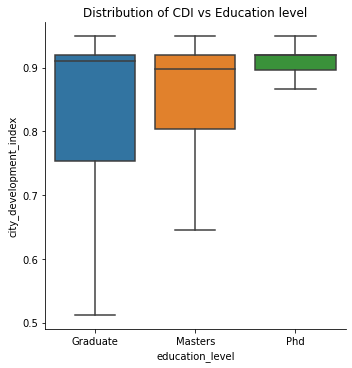

In [ ]:
## Plottting a Boxplot to check the distribution 

sns.catplot(x="education_level", y="city_development_index", kind="box", data=df_cdi_edu, showfliers = False).set(title='Distribution of CDI vs Education level');

In general, the candidates with higher qualifications belong to cities with higher CDI

1.2.3) Relationship between CDI and city code

In [ ]:
df_Clean.groupby('cdi_bucket', as_index=False)['city'].nunique().rename(columns={'city':'Number of cities'})   \
                .sort_values(by = 'Number of cities', ascending = False).reset_index(drop=True)

,cdi_bucket,Number of cities
0,very_high_human_development,47
1,medium_human_development,36
2,high_human_development,28
3,low_human_development,9


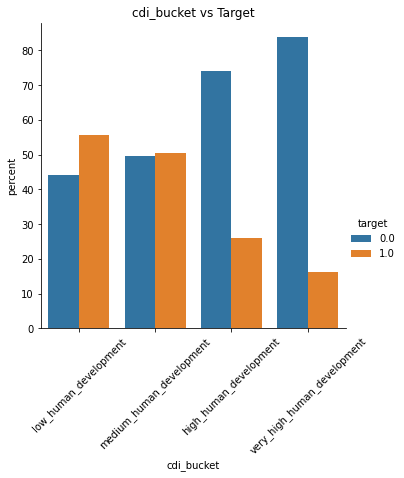

In [ ]:
### Impact of CDI on attrition  using a normalized bar plot.
norm_cnt_plt(['cdi_bucket'], df_Clean)


Candidates from cities with lower and medium development index are more likely to look for a change.

# Jacinto Notebook


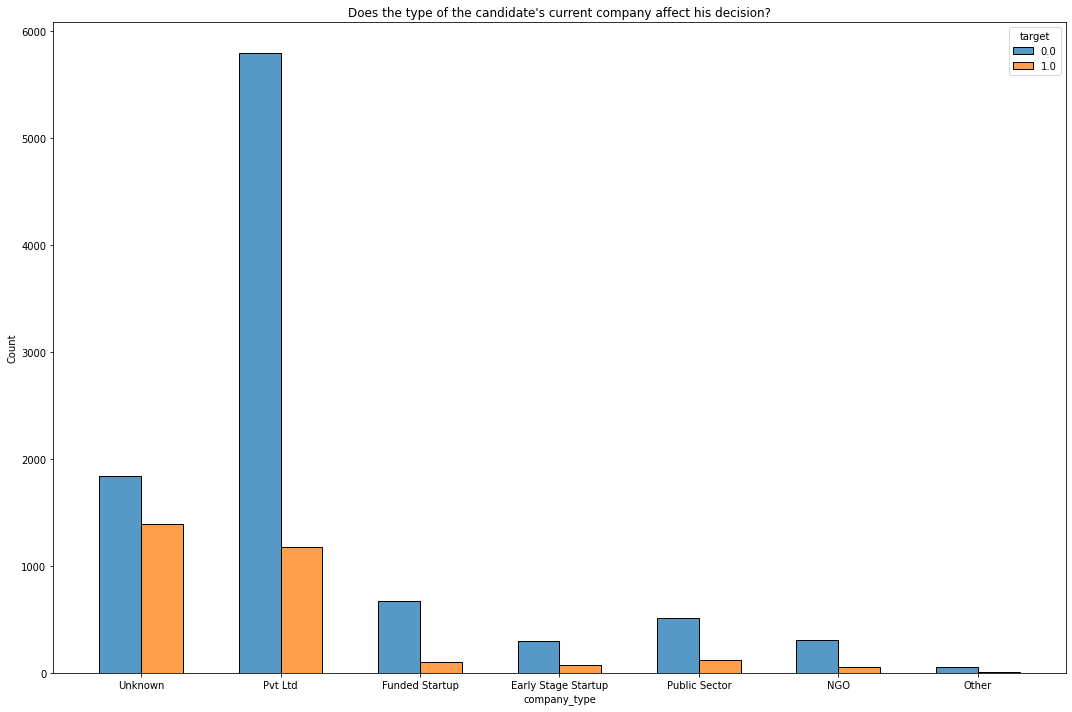

In [ ]:
plt.figure(figsize=[15,10])
categories=["company_type"]
n=1
for f in categories:
    sns.histplot(data = df_Clean,x=f,hue="target",multiple="dodge", shrink = 0.6)
    plt.title("Does the type of the candidate's current company affect his decision?")
    n=n+1
plt.tight_layout()
plt.show()

It seems like candidates from private companies tend to stay with the "company" after training. However, 75% of the candidates come from private companies. We need to further investigate into why most data scientist candidates come from a private company. Is there a reason? Maybe "company" should focus its efforts into targeting only that company type. We could isolate those who come from pvt ltd.

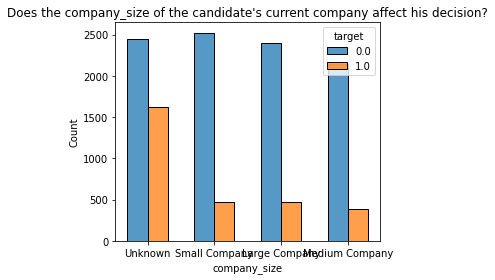

In [ ]:
sns.histplot(data = df_Clean,x="company_size",hue="target",multiple="dodge", shrink = 0.6)
plt.title("Does the {} of the candidate's current company affect his decision?".format("company_size"))

plt.tight_layout()
plt.show()

When comparing the sizes of the candidates' current companies, the candidates coming from small companies tend to stay with the "company" after training the most. However, there is not a clear relationship between the company size and the candidate's decision to stay after training.

In [ ]:
import plotly.express as px

fig = px.pie(df_Clean['company_type'].value_counts(), values='company_type', 
             names = df_Clean['company_type'].value_counts().index,title = 'What is the most prevalent company type in the dataset?',template='ggplot2')
fig.show()

What type of company do most company hires come from? Most candidates come from private limited companies.

In [ ]:
fig = px.pie(df_Clean['company_size'].value_counts(), values='company_size', 
             names = df_Clean['company_size'].value_counts().index,title = 'What is the most prevalent company size in the dataset?',template='ggplot2')
fig.show()

What company size do most candidates come from? Not a clear winner; hires come from different size companies.

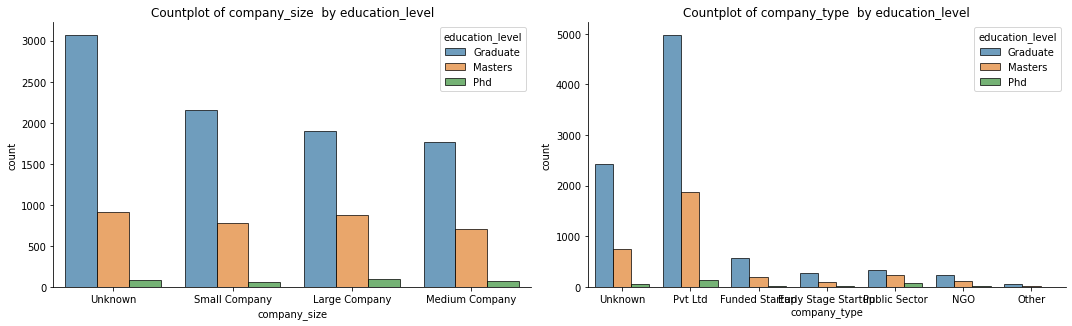

In [ ]:
plt.figure(figsize=[15,17])
categories=["company_size", "company_type"]
n=1
for f in categories:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Caroline Guo
Relevant_experience, Experience, last_new_job


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')
df.head()

In [ ]:
# Bucketing the company_size values into categorizes
df['size'] = np.where(df['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), 'Medium Company',df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df['size'])
sorted_counts=df['size'].value_counts()

In [ ]:
df_Clean = df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')

In [ ]:
df_Clean['company_size'].replace({'10/49':'10-49'}, inplace=True)

In [ ]:
df_Clean.drop(['company_size'], axis=1, inplace=True)
df_Clean.rename(columns={'size': 'company_size'}, inplace=True)

### 1. No Gap/Yes Gap: will the gap years of jobs affect whether a candidate is staying or leaving?

In [ ]:
# First see the portion of the duration of job gap
ep = df_Clean['last_new_job'].value_counts().reset_index()
ep.columns = [
    'last_new_job', 
    'percent'
]
ep['percent'] /= len(df)
fig = px.pie(
    ep, 
    names='last_new_job', 
    values='percent', 
    title='Last_new_job', 
    width=800,
    height=500 
)

fig.show()

In [ ]:
# Then plot the last_new_job towards target to see the difference
plt.figure(figsize=[15,17])
plot=["last_new_job"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

According to these plot, we can easily tell that when the gap year(s) between last and new is(are) 1 or 2, the ratio between leave and stay is 1:3. When the gap duration increases to 3, 4 or even more than 4, the ratio of leave and stay decreases to 1:4. This means if the last job and new job gap turns longer, more candidates tend to stay in this Big Data company correspondingly.

However, when we come to candidates never change their job -- the 'never' group, we can see that the ratio between leave and stay are 1:2, which means least candidates in this group will stay in this company rather than their original ones.

This will give HR a hint: When recruiting candidates to join this program, we can turn to candidates with longer gap beween last job and new one. However, not the ones who never change their job, those may experience nostalgia and don't want any change.

### 2. Is the hiring of Data Scientists impacted by their previous experience?

In [ ]:
# Set bins for experience to make the graph clearer
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['<1','1','2','3','4','5']), 'Primary Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['6','7','8','9','10']), 'Little Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['11','12','13','14','15']), 'Have Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['16','17','18','19','20','>20']), 'Many Experience',df_Clean['experience'])

In [ ]:
# First see the portion of experiecne
ep = df_Clean['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(df_Clean)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

In [ ]:
# Then plot different groups by target to see the result
plt.figure(figsize=[15,17])
plot=["experience"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

This graph, from the left hand side to the right, candidates have fewer working experiecne. We can easily tell that group with more experience, candidates tend to stay in Big Data company after training. And this trend is monotonical.

This gives HR the hint -- Candidates with more experience joining this program will tend to stay.

###3. How long should the candidates get trained if the STEM candidates have relevant experience?

In [ ]:
# Set new conditions and values to match & save to a new column
condition = [
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience')
]

In [ ]:
values = ['STEM_rel', 'STEM_nonrel', "Non_STEM_rel", "Non_STEM_nonrel"]

In [ ]:
df_Clean['educational condition'] = np.select(condition, values)
df_Clean.head()

#### 3.1 Educational Condition by target

In [ ]:
# Plot the educational condition by target to see the different
plt.figure(figsize=[15,17])
plot=["major_discipline", "relevent_experience", "educational condition"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Through this plot, it is undeniable that candidates with relevent experiecne tend to stay in this company, especially when we compare 'relevent' with 'non_relevent' groups.

#### 3.2 Educational Condition by training hours

In [ ]:
# Plot the educational condition by target to see the different ???
plt.figure(figsize=[15,17])
plot=["educational condition"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='training_hours', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Chris Notebook
Training hours with target


1. How much training hours does the company invest in its future employees? 
2. Will candidates enrolled in university experience longer or shorter training hours?    
3. Does company size/type affect the number of training hours?   

In [ ]:
import numpy as np

In [ ]:
hr = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [ ]:
hr['size'] = np.where(hr['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
hr['size'] = np.where(hr['company_size'].isin(['100-500','500-999']), 'Medium Company',hr['size'])
hr['size'] = np.where(hr['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',hr['size'])
sorted_counts=hr['size'].value_counts()

In [ ]:
df_Clean = hr.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')
df_Clean['company_size'].replace({"10/49":"10-49"}, inplace=True)
df_Clean.drop(['company_size'], axis=1, inplace=True)
df_Clean.rename(columns={'size': 'company_size'}, inplace=True)

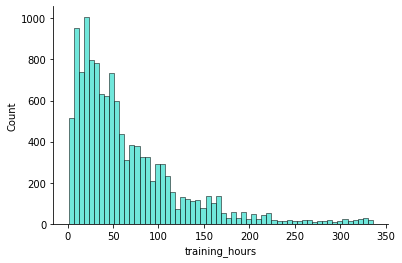

In [ ]:
# How much training hours does the company invest in its future employees? we can plot a histogram of training hours.)
sns.histplot(data=df_Clean, x="training_hours", color = 'turquoise')
sns.despine()

In [ ]:
df_Clean['training_hours'].median()

47.0

Distribution is right skewed. On average, the company spends approximately 47 hours training its future employees.

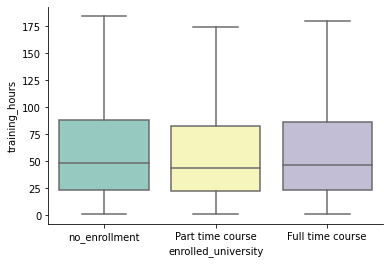

In [ ]:
# Will candidates enrolled in university experience longer or shorter training hours? - boxplot
sns.boxplot(x="enrolled_university", y="training_hours",
                 data= df_Clean, palette="Set3", showfliers = False)
sns.despine()

The distribution is quite similar for all three enrolled university categories. However, no_enrollment seems to have slightly higher training hours compared to those of the other two. This makes sense as people who are not enrolled in university may have more time for training. 

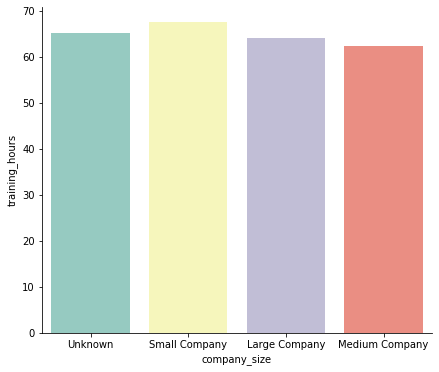

In [ ]:
# Does company size/type affect the number of training hours? - boxplot
plt.figure(figsize=[7,6])

sns.barplot(x="company_size", y="training_hours",
                 data= df_Clean, palette="Set3", ci = None)
sns.despine()

Small company tends to have higher training hours compared to the others, which makes sense considering the fact that people from smaller companies may not have as much experience compared to people from larger and more established companies. 

In [ ]:
plt.figure(figsize=[12,6])

sns.barplot(x="company_type", y="training_hours",
                 data= df_Clean, palette="Set3", ci = None)
sns.despine()

Startups have highest training hours, followed by pvt and NGO, and public sector has lowest training hours. 

**Graphs for training hours with target**

In [ ]:
#plot 1 stacked
plt.figure(figsize=[10,6])
sns.histplot(data=df, x="training_hours", hue="target", multiple="stack")
sns.despine()

In [ ]:
#plot 2 

sns.boxplot(x="education_level", y="training_hours", hue="target",
                 data=df, palette="Set3", showfliers = False)
plt.legend(loc='upper right', title='Target')
sns.despine()